In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib as jb
import tifffile
from pathlib import Path
from glob import glob
import math
import cv2
import colorsys
from satellite_bathymetry.preprocessing import get_coord_from_pixel_pos, get_pixel_from_coord, ndwi, pixel_ndwi, pixel_log_ratio

In [2]:
path_data = '../data/bands'

In [3]:
mask_path = 'generated/masks/'

In [4]:
bands_list = [e for e in glob(str(path_data)+'/*')]
bands_list.sort()

In [5]:
bands_dict = {}
for i, e in enumerate(bands_list):
    bands_dict[f'b{i+1}'] = tifffile.TiffFile(e)

In [6]:
aux_dict = dict()
for page in bands_dict['b1'].pages:
    for tag in page.tags.values():
        aux_dict[tag.name] = tag.value

scale_x = aux_dict['ModelTransformationTag'][0]
scale_y = aux_dict['ModelTransformationTag'][5]
start_value_x = aux_dict['ModelTransformationTag'][3]
start_value_y = aux_dict['ModelTransformationTag'][7]

In [7]:
bands_arrays_dict = {}
for k, v in bands_dict.items():
    bands_arrays_dict[k] = v.asarray()

In [8]:
ndwi_image = ndwi(bands_arrays_dict['b3'],bands_arrays_dict['b8'])

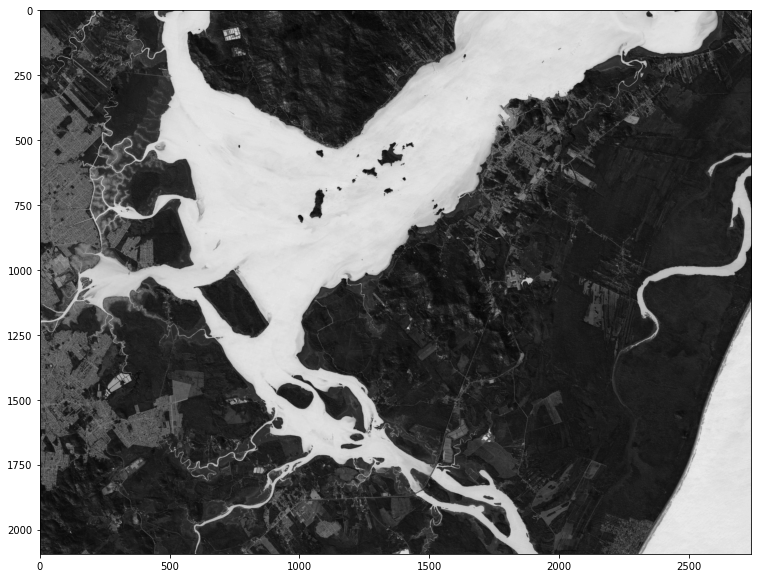

In [9]:
plt.figure(figsize=(18,10))
plt.imshow(ndwi_image,'gray')

True

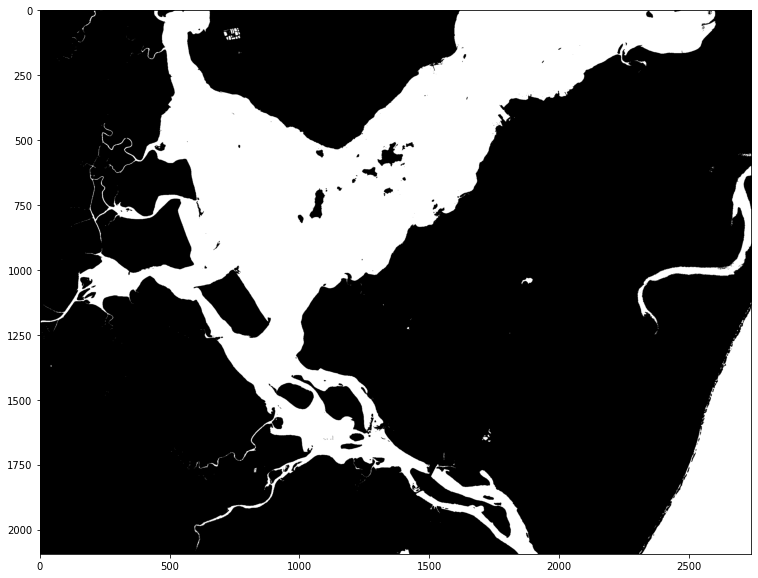

In [10]:
plt.figure(figsize=(18,10))
plt.imshow(ndwi_image > 0.3,'gray')
mask = (ndwi_image > 0.3)*255
cv2.imwrite(f'{mask_path}ndwi38_03.jpg',mask)

True

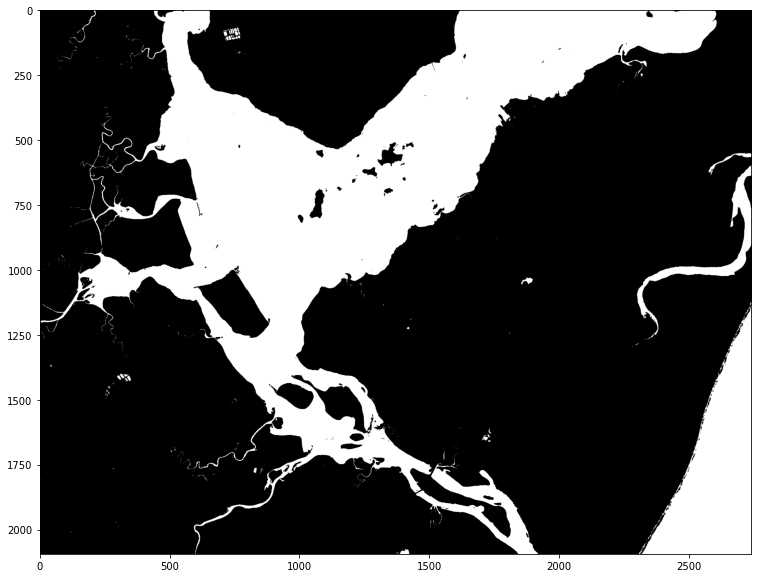

In [11]:
plt.figure(figsize=(18,10))
plt.imshow(ndwi_image > 0.2,'gray')
mask = (ndwi_image > 0.2)*255
cv2.imwrite(f'{mask_path}ndwi38_02.jpg',mask)

True

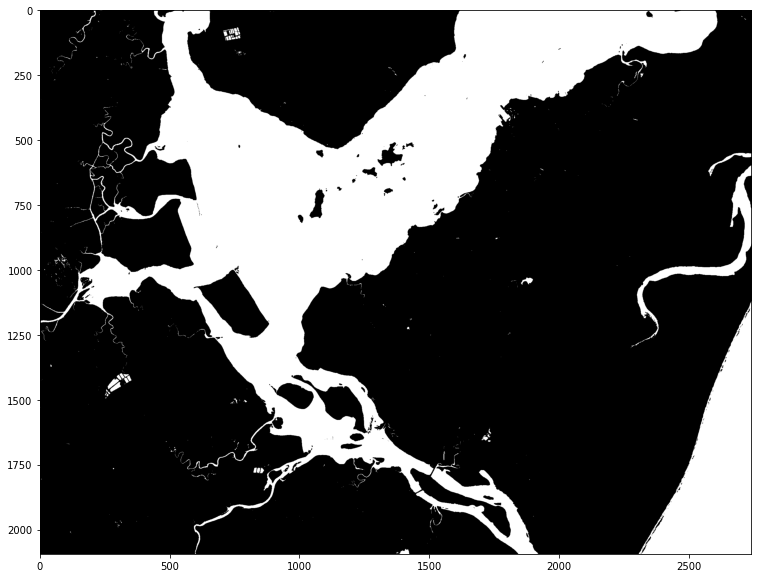

In [12]:
plt.figure(figsize=(18,10))
plt.imshow(ndwi_image > 0.1,'gray')
mask = (ndwi_image > 0.1)*255
cv2.imwrite(f'{mask_path}ndwi38_01.jpg',mask)